### Code to plot the most recent autonomous motion profile
#### 12/28/2019 CJH

In [18]:
import sys
import time
from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ip = '172.22.11.2'
ip = 'roboRIO-2429-FRC.local'
NetworkTables.initialize(server=ip)

False

In [4]:
def valueChanged(table, key, value, isNew):
    print("valueChanged: key: '%s'; value: %s; isNew: %s" % (key, value, isNew))
def connectionListener(connected, info):
    print(info, "; Connected=%s" % connected)

In [5]:
NetworkTables.addConnectionListener(connectionListener, immediateNotify=True)

ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=1167.328, protocol_version=768) ; Connected=True


In [52]:
sd = NetworkTables.getTable("SmartDashboard")

In [104]:
# this was a lot simpler but stupid network tables can only take 256 values per array
data_time = np.array(sd.getNumberArray('telemetry_time',0))
data_position = np.array(sd.getNumberArray('telemetry_position',0))
data_velocity = np.array(sd.getNumberArray('telemetry_velocity',0))
data_current = np.array(sd.getNumberArray('telemetry_current',0))
data = np.column_stack((data_time,data_position,data_velocity,data_current))
df = pd.DataFrame(data, columns =['time','position', 'velocity', 'current']).round(3)
len(data)

173

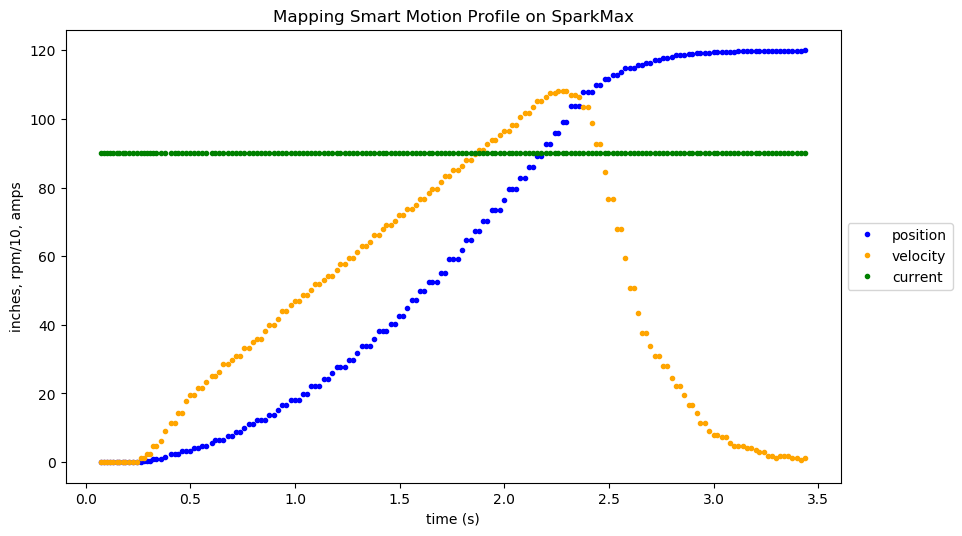

In [105]:
# multiple line plot
save = False
markersize = 3
linewidth = 1.2
colors=['blue', 'orange', 'green', 'red']
label = "Mapping Smart Motion Profile on SparkMax"
plt.figure(num=None, figsize=(10,6),dpi=100)
for i in range(3):
    plt.plot( 'time', df.columns[i+1], data=df, marker='o', markerfacecolor=colors[i], markersize=markersize, color=colors[i], linewidth=0)
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(-1.1,1.1)
plt.title(label)
plt.xlabel('time (s)')
plt.ylabel('inches, rpm/10, amps')
if save:
    plt.ioff()
    plt.savefig(fname)
    plt.close()
plt.show()